## UNSUPERVISED MACHINE LEARNING EXERCISE

In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

### DATA PREPROCESING

In [2]:
file = pd.read_csv('myopia.csv')
file.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
X = file.drop('MYOPIC', axis=1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


### DATA PIPELINE

In [17]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9)),
    ('tsne', TSNE())
]
cleaning_pipe = Pipeline(steps)

reduced_data =cleaning_pipe.fit_transform(X)

## MODEL: K MEANS

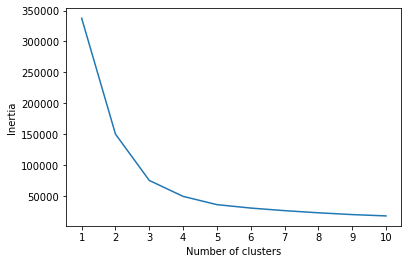

In [18]:
def find_k(dataframe):
    k = list(range(1, 11))
    inertia = []
    for i in k:
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(dataframe)
        inertia.append(km.inertia_)
    elbow_data = {"k": k, "inertia": inertia}
    df_elbow = pd.DataFrame(elbow_data)
    plt.plot(df_elbow['k'], df_elbow['inertia'])
    plt.xticks(range(1,11))
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    
    return plt.show()

find_k(reduced_data)

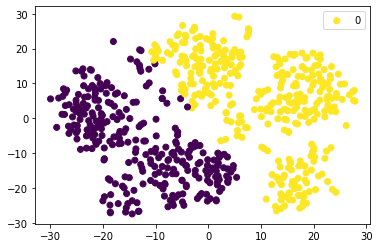

In [12]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(reduced_data)
predictions = model.predict(reduced_data)


plt.scatter(reduced_data[:,0], reduced_data[:,1], c=model.labels_.astype(float))
plt.legend(model.labels_.astype(float))
plt.show()


In [13]:
X["model_results"]=model.labels_
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,model_results
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,0
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,1


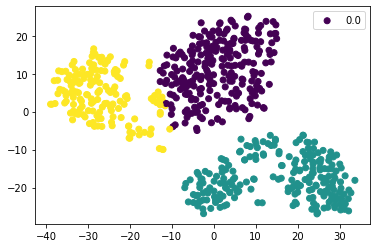

In [28]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(reduced_data)
predictions = model.predict(reduced_data)


plt.scatter(reduced_data[:,0], reduced_data[:,1], c=model.labels_.astype(float))
plt.legend(model.labels_.astype(float))
plt.show()


In [29]:
X["model_results"]=model.labels_
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,model_results
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,0
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,2
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


## ANALYSIS:

we can see how the elbow approach highlighted either 2 or 3 for the value of k for the Kmean model. The model that uses only 2 clusters gets very close to the real MYOPIC categories of the original data, in contrast with the use of 3 clusters. Even though this exercise focuses on unsupervised learning, it is important to understand the context of the data since there are only two possible answers: to have or not to have myopia.

nonetheless considering that the algorithm suggested more than 2 clusters there may be a chance to see if it would be useful for further studies, for example helping to determine people that do not currently have myopia have factors that would increase their chances of developing it (making them part of a 3rd group for higher risk for instance)



